## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_context("notebook")
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
file = 'lalonde.csv'

In [3]:
lalonde = pd.read_csv(file)
lalonde.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [4]:
lalonde['white'] = np.maximum(1-(lalonde['black'] + lalonde['hispan']),0)
lalonde[7:11]

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.158,0
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.022,0
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.070,1
10,NSW11,1,19,9,1,0,0,1,0.0,0.0,8173.908,0


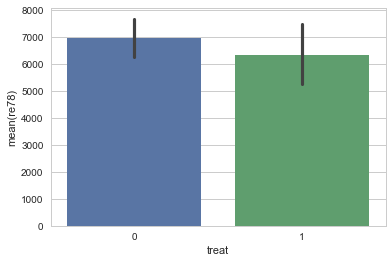

In [5]:
ax = sns.barplot(x="treat", y="re78",
                 data=lalonde)

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64


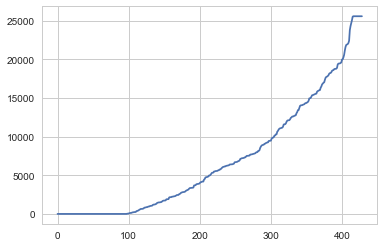

count      414.000000
mean      6312.330289
std       6495.859175
min          0.000000
25%        125.976175
50%       4476.773000
75%      10720.170000
max      24647.000000
Name: re78, dtype: float64


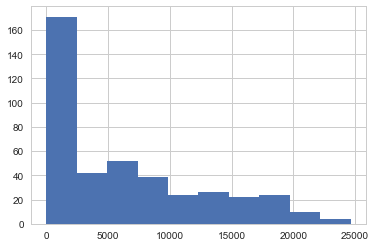

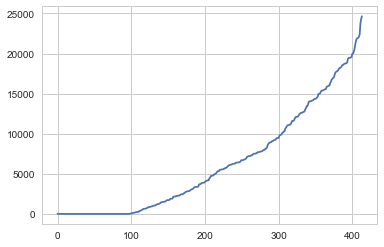

In [6]:
groupNotTreated = lalonde[lalonde['treat'] == 0]['re78'].sort_values()
print(groupNotTreated.describe())
plt.plot(groupNotTreated.values)
plt.show()

print(groupNotTreated[:-15].describe())
plt.hist(groupNotTreated[:-15].values)
plt.show()
plt.plot(groupNotTreated[:-15].values)
plt.show()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64


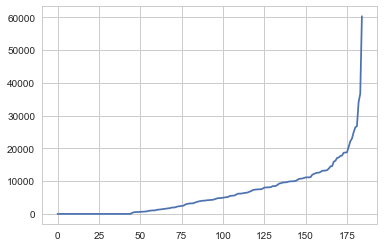

count      170.000000
mean      4651.945901
std       4595.323255
min          0.000000
25%          0.000000
50%       3691.261000
75%       8080.986500
max      17094.640000
Name: re78, dtype: float64


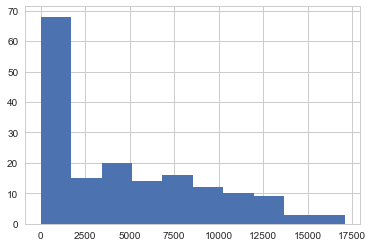

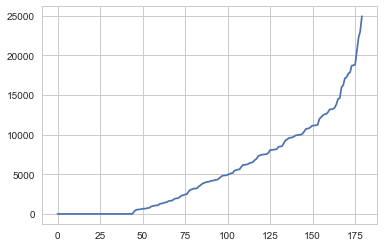

In [7]:
groupTreated = lalonde[lalonde['treat'] == 1]['re78'].sort_values()
print(groupTreated.describe())
plt.plot(groupTreated.values)
plt.show()

print(groupTreated[:-15].describe())
plt.hist(groupTreated[:-15].values)
plt.show()
plt.plot(groupTreated[:-5].values)
plt.show()

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.



- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

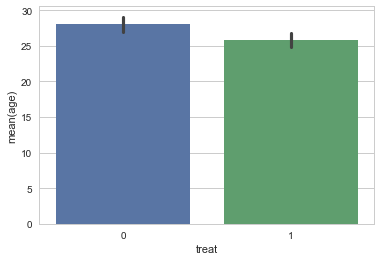

count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64


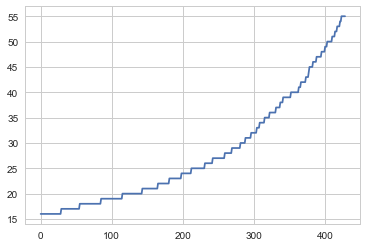

count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64


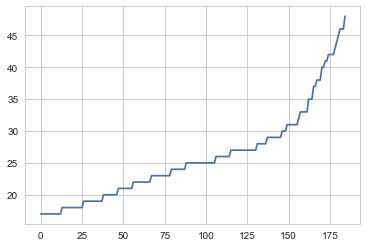

In [8]:
ax = sns.barplot(x="treat", y="age",
                 data=lalonde)
plt.show()

ageNotTreated = lalonde[lalonde['treat'] == 0]['age'].sort_values()
print(ageNotTreated.describe())
plt.plot(ageNotTreated.values)
plt.show()

ageTreated = lalonde[lalonde['treat'] == 1]['age'].sort_values()
print(ageTreated.describe())
plt.plot(ageTreated.values)
plt.show()

In [9]:
def plot_continuous_feature_against_treatment(dataset, feature):

    ax = sns.barplot(x="treat", y="educ",
                     data=lalonde)
    plt.show()

    ageNotTreated = lalonde[lalonde['treat'] == 0]['educ'].sort_values()
    print(ageNotTreated.describe())
    plt.plot(ageNotTreated.values)
    plt.show()

    ageTreated = lalonde[lalonde['treat'] == 1]['educ'].sort_values()
    print(ageTreated.describe())
    plt.plot(ageTreated.values)
    plt.show()

In [10]:
def plot_binary_feature_against_treatment(dataset, feature, color_good, color_not='dusty blue'):

    fig = plt.figure(1)
    plt.subplot(121)
    fig.tight_layout(pad=5)
    fig.set_size_inches(16, 8)

    ax = sns.countplot(x="treat", hue=feature, palette=sns.xkcd_palette([color_not,color_good]),
                     data=dataset)
    plt.xticks([0,1],['not treated', 'treated'])
    plt.ylabel('Number of people')
    plt.xlabel('Treatment')
    plt.legend(['not '+feature, feature])

    plt.subplot(122)

    ax = sns.barplot(x="treat", y=feature,ci=None,
                     data=dataset)
    plt.xticks([0,1],['not treated', 'treated'])
    plt.ylabel('Proportion of ' + feature + ' people')
    plt.xlabel('Treatment')
    plt.show()

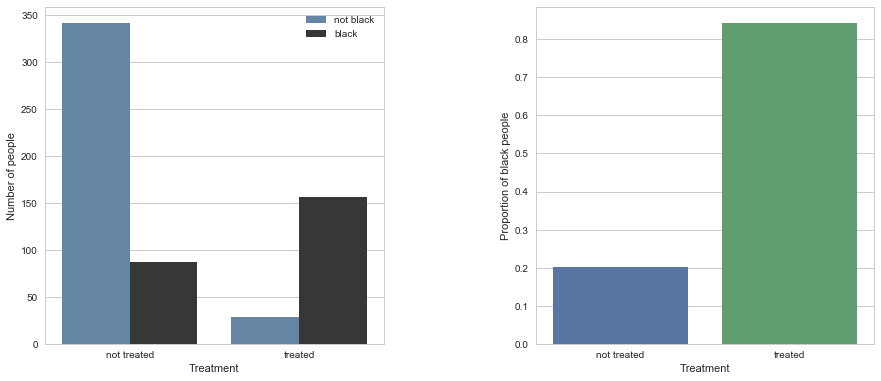

In [11]:
plot_binary_feature_against_treatment(lalonde, 'black', "dark grey")

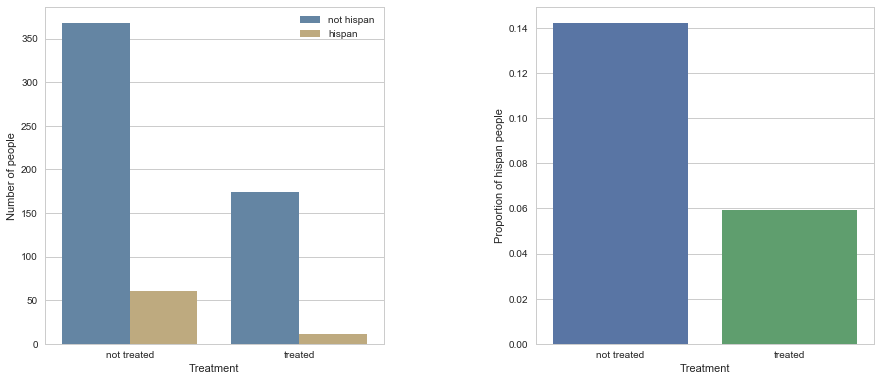

In [12]:
plot_binary_feature_against_treatment(lalonde, 'hispan', "sandstone")

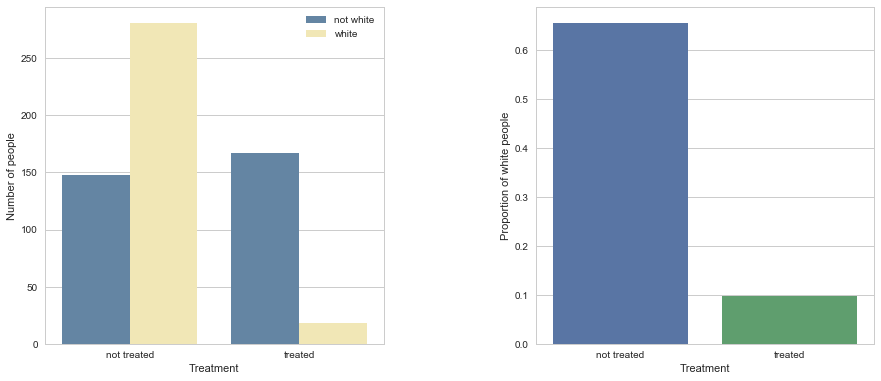

In [13]:
plot_binary_feature_against_treatment(lalonde, 'white', "light tan")

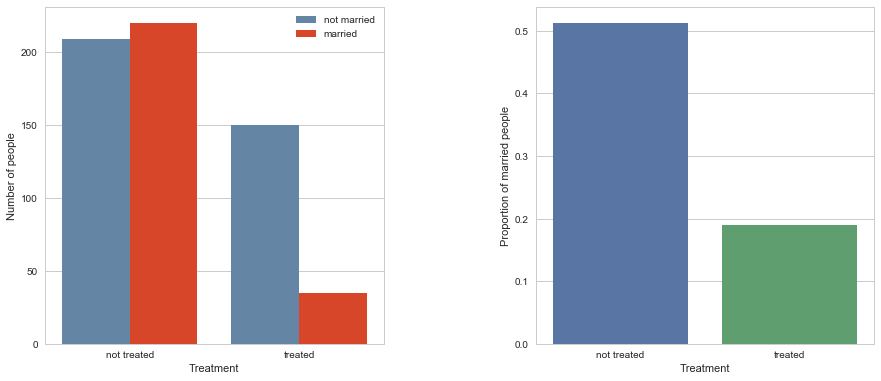

In [14]:
plot_binary_feature_against_treatment(lalonde, 'married', "vermillion")

In [15]:
lalonde_degree = lalonde.copy()
lalonde_degree['nodegree'] = 1-lalonde_degree['nodegree']
lalonde_degree = lalonde_degree.rename(columns={'nodegree':'degree'})
lalonde_degree.head()

,id,treat,age,educ,black,hispan,married,degree,re74,re75,re78,white
0,NSW1,1,37,11,1,0,1,0,0.0,0.0,9930.0460,0
1,NSW2,1,22,9,0,1,0,0,0.0,0.0,3595.8940,0
2,NSW3,1,30,12,1,0,0,1,0.0,0.0,24909.4500,0
3,NSW4,1,27,11,1,0,0,0,0.0,0.0,7506.1460,0
4,NSW5,1,33,8,1,0,0,0,0.0,0.0,289.7899,0


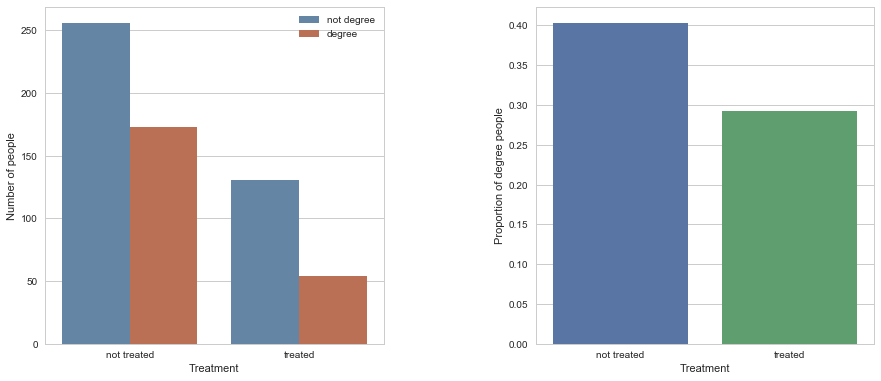

In [16]:
plot_binary_feature_against_treatment(lalonde_degree, 'degree', "terracota")

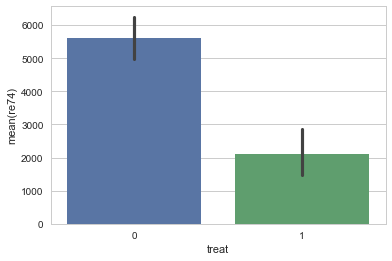

count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64


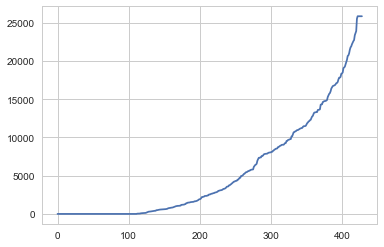

count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64


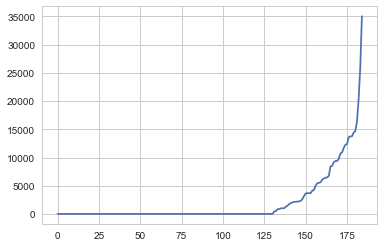

In [17]:
ax = sns.barplot(x="treat", y="re74",
                 data=lalonde)
plt.show()

oldSal1NotTreated = lalonde[lalonde['treat'] == 0]['re74'].sort_values()
print(oldSal1NotTreated.describe())
plt.plot(oldSal1NotTreated.values)
plt.show()

oldSal1Treated = lalonde[lalonde['treat'] == 1]['re74'].sort_values()
print(oldSal1Treated.describe())
plt.plot(oldSal1Treated.values)
plt.show()

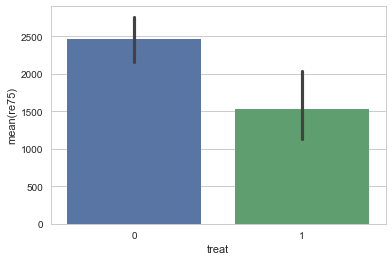

count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64


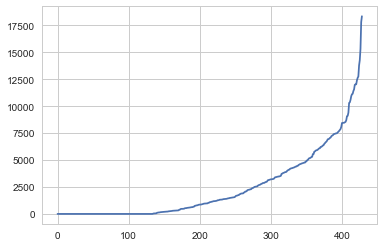

count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64


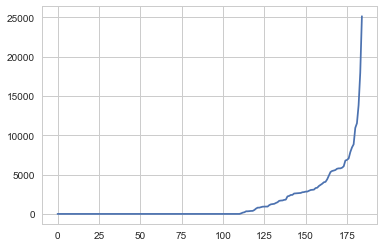

In [18]:
ax = sns.barplot(x="treat", y="re75",
                 data=lalonde)
plt.show()

oldSal2NotTreated = lalonde[lalonde['treat'] == 0]['re75'].sort_values()
print(oldSal2NotTreated.describe())
plt.plot(oldSal2NotTreated.values)
plt.show()

oldSal2Treated = lalonde[lalonde['treat'] == 1]['re75'].sort_values()
print(oldSal2Treated.describe())
plt.plot(oldSal2Treated.values)
plt.show()

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)



#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?




#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?




## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

#### Part 1
Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).




## Solution
-- --
For this part, we have first imported the data using the fetch_20newsgroups method. We have to specify the 'all' subset argument, so that we have the whole dataset, and not only the training part. We had first removed the 'headers', 'footers' and 'quotes' of the dataset : in the link, it's specified that it's a more realistic setting, however if we exclude them, we only have a 65-67% of maximum accuracy. Thus, we choose to include them. It introduces more words in the vocabulary, 173451 instead of 134101.

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [63]:
newsgroups_all = fetch_20newsgroups(subset='all')#, remove=('headers', 'footers', 'quotes'))

We can see here what are the 20 categories.

In [94]:
newsgroups_all.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [68]:
newsgroups_all.data[0]

'From: guyd@austin.ibm.com (Guy Dawson)\nSubject: Re: IDE vs SCSI, DMA and detach\nOriginator: guyd@pal500.austin.ibm.com\nOrganization: IBM Austin\nLines: 60\n\n\nIn article <1993Apr19.034517.12820@julian.uwo.ca>, wlsmith@valve.heart.rri.uwo.ca (Wayne Smith) writes:\n> In article <RICHK.93Apr15075248@gozer.grebyn.com> richk@grebyn.com (Richard Krehbiel) writes:\n> >>     Can anyone explain in fairly simple terms why, if I get OS/2, I might \n> >>   need an SCSI controler rather than an IDE.  Will performance suffer that\n> >>   much?  For a 200MB or so drive?  If I don\'t have a tape drive or CD-ROM?\n> >>   Any help would be appreciated.\n> \n> >So, when you\'ve got multi-tasking, you want to increase performance by\n> >increasing the amount of overlapping you do.\n> >\n> >One way is with DMA or bus mastering.  Either of these make it\n> >possible for I/O devices to move their data into and out of memory\n> >without interrupting the CPU.  The alternative is for the CPU to move\n> >th

We do directly apply the TfidfVectorizer on the data component of newsgroups_all. We choose to indicate 'english' for the stop words used for this vectorizer, so that the dataset is preprocessed.

In [64]:
vectorizer = TfidfVectorizer(stop_words='english')
TF_IDF_features = vectorizer.fit_transform(newsgroups_all.data)
TF_IDF_features

<18846x173451 sparse matrix of type '<class 'numpy.float64'>'
	with 2142075 stored elements in Compressed Sparse Row format>

We obtain the article category in labels.

In [25]:
labels = newsgroups_all.target

In [26]:
print('size of labels:',len(labels))
print('(number of posts, vocabulary TF-IDF):',TF_IDF_features.shape)

size of labels: 18846
number of posts * vocabulary TF-IDF: (18846, 134101)


We split the dataset into three parts : train, test and validation. We choose to do it manually, as train_test_split splits into only two sets, and it's easy to understand how it does behave in this way. We put a seed to have recomputable results.

In [65]:
np.random.seed(0)
permutation = np.random.permutation(np.arange(len(labels)))
train_limit = int(len(labels) * 0.8)
test_limit = int(len(labels) * 0.9)

train_perm = permutation[:train_limit]
test_perm = permutation[train_limit:test_limit]
validation_perm = permutation[test_limit:]

In [66]:
train = (TF_IDF_features[train_perm], labels[train_perm])
test = (TF_IDF_features[test_perm], labels[test_perm])
validation = (TF_IDF_features[validation_perm], labels[validation_perm])

#### Part 2

Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



## Solution
-- --
We have created a grid search setup, using a logspace for each parameter to search for roughly good parameters. After some investigation, we found that a bigger forests (around 300 trees) takes a lot of time to compute (around 5 minutes). Also, the max_depth number has a big impact, as it involves more computation time. Thus, we choose to have a result that gives good results, but also that does not take too much time for the given results. Thus, we have chosen the setup with 300 trees and a max_depth of 112, as even if it's not the best (there are better results with bigger numbers), it already takes some time to be computed, and seems to be a good tradeoff to avoid too big trees in term of depth (and thus more variance).
We choose as a metric the accuracy, as we want the different kinds of errors to have the same importance.

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [98]:
n_estim_range = np.logspace(1,2,5)*3
m_dep_range = np.logspace(1,2,5)*2
accuracies = np.empty((5,5))
np.random.seed(0)

for i,n_est in enumerate(n_estim_range):
    for j,m_dep in enumerate(m_dep_range):
        rf = RandomForestClassifier(n_estimators=int(n_est), max_depth=int(m_dep))
        rf.fit(train[0], train[1])
        accuracies[i][j] = accuracy_score(validation[1], rf.predict(validation[0]))
        print(accuracies[i][j], 'n_estimators:', int(n_est), 'max_depths:',int(m_dep))

0.693368700265 n_estimators: 30 max_depths: 20


KeyboardInterrupt: 

We can see here a summary of what was found just before. The column indexes correspond to the number of trees, and the row indexes correspond to the max depth parameter. We clearly see that when we have more trees and bigger trees, the accuracy score is better.

In [95]:
pd.DataFrame(accuracies, columns=n_estim_range.astype(int), index=m_dep_range.astype(int))

,30,53,94,168,300
20,0.718302,0.746950,0.805305,0.837666,0.854111
35,0.742175,0.797347,0.844562,0.855703,0.861008
63,0.776127,0.812732,0.851459,0.860477,0.871618
112,0.792042,0.831300,0.859416,0.872149,0.876393
200,0.799469,0.835013,0.864721,0.882228,0.881167


In [84]:
from sklearn.metrics import confusion_matrix

Here, we use the best hyperparameters got before.

In [99]:
np.random.seed(0)
rf = RandomForestClassifier(n_estimators=300, max_depth=112)
rf.fit(train[0], train[1])
prediction = rf.predict(test[0])

We show the confusion matrix using a heatmap. We clearly see that the best values are in the diagonal, where we do have good matches. For the values like in true values 18 and 19, there are some bad matches, as shown by the 12 and 14 articles in the categories 16 and 15. It seems fair for this prediction model, as it has predicted some christian articles to religion articles, and some gun articles to politics articles.

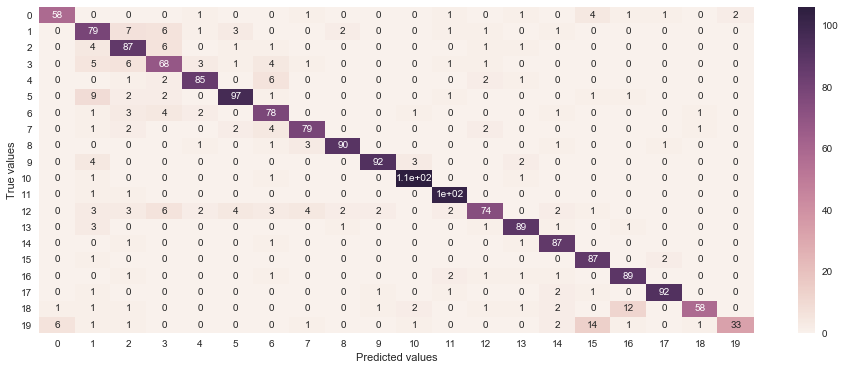

In [116]:
confusion = pd.DataFrame(confusion_matrix(test[1], prediction))

fig, ax = plt.subplots()
ax = sns.heatmap(confusion, annot=True)

fig.set_size_inches(16, 6)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

If we look at the top 10 features accoding to the $feature_importances_$ attribute of the random forest, we see that keywords like 'sale', 'windows', 'bike', 'car', 'hockey', 'god' are important features. If we look at the categories (see below), we can clearly see that these words are clearly linked to categories : 'sale' is for 'forsale', 'car' is for 'autos' etc. Thus, the best $feature_importances_$ are very selective criterion.

In [138]:
newsgroups_all.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [133]:
#We zip the feature importances and their index. Then, we sort according to the geature importance score. We only keep
#the indexes, so that we have the best features.
best_features = list(map(lambda p: p[1],sorted(zip(rf.feature_importances_, np.arange(len(rf.feature_importances_))),
                                          reverse=True)))

In [137]:
top = 10

#For each feature index, we search what it was in the vocabulary given in the vectorizer. We keep the top 10.
np.array(vectorizer.get_feature_names())[best_features][:top]

array(['sale', 'windows', 'dod', 'bike', 'car', 'space', 'clipper',
       'hockey', 'god', 'israel'], 
      dtype='<U180')